<a href="https://colab.research.google.com/github/fbsaif007/fbsaif007/blob/main/LSTM_with_window_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
92/92 - 2s - loss: 0.0560 - 2s/epoch - 24ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0289 - 174ms/epoch - 2ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0182 - 188ms/epoch - 2ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0148 - 212ms/epoch - 2ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0131 - 187ms/epoch - 2ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0117 - 178ms/epoch - 2ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0103 - 231ms/epoch - 3ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0090 - 194ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0077 - 190ms/epoch - 2ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0066 - 191ms/epoch - 2ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0058 - 186ms/epoch - 2ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0052 - 207ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0048 - 198ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0046 - 191ms/epoch - 2ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0043 - 193ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0041 - 177ms/epoc

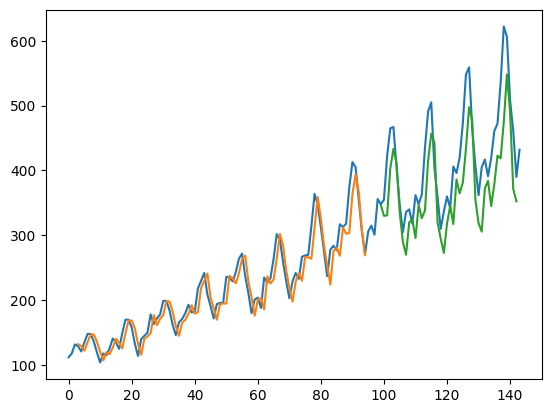

In [3]:
# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()